<a href="https://colab.research.google.com/github/sg758253/IDS/blob/main/HW7/project7_p.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Name: Sachin Gupta (sg758253@sju.edu)
* Date: 05/03/22
* Assignment: 7

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

# Task 1: Load the data

In [ ]:
# import dataset
df= pd.read_csv("https://raw.githubusercontent.com/sg758253/IDS/main/HW7/dermatology.csv")

# display all columns
pd.set_option('display.max_columns',None)
df

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,pnl_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,25.0,4
362,3,2,1,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2,0,36.0,4
363,3,2,2,2,3,2,0,2,0,0,0,2,2,0,0,3,3,0,0,0,0,0,0,0,3,0,3,0,3,0,0,2,3,28.0,3
364,2,1,3,1,2,3,0,2,0,0,0,2,0,0,0,3,2,0,0,0,0,0,0,0,3,0,2,0,1,0,0,2,3,50.0,3


In [ ]:
# describe dataset
df.describe()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,pnl_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,age,class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,358.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,0.125683,0.404372,0.139344,0.546448,0.336066,1.368852,1.956284,0.527322,1.289617,0.663934,0.991803,0.633880,0.295082,0.363388,0.393443,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,36.296089,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,0.331946,0.869818,0.411790,0.815451,0.853139,1.104418,0.712512,0.757116,0.917562,1.056829,1.162161,1.034924,0.670578,0.759721,0.849406,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,15.324557,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,49.750000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000,6.000000


In [ ]:
# to show datatype of each class
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   erythema                                  366 non-null    int64  
 1   scaling                                   366 non-null    int64  
 2   definite_borders                          366 non-null    int64  
 3   itching                                   366 non-null    int64  
 4   koebner_phenomenon                        366 non-null    int64  
 5   polygonal_papules                         366 non-null    int64  
 6   follicular_papules                        366 non-null    int64  
 7   oral_mucosal_involvement                  366 non-null    int64  
 8   knee_and_elbow_involvement                366 non-null    int64  
 9   scalp_involvement                         366 non-null    int64  
 10  family_history                        

# Task2: Test for presence any missing attribute/target values and impute as necessary.

In [ ]:
# check null values
df.isnull().sum().sum()

8

In [ ]:
# check null values
df.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
pnl_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

Age has total 8 missing value, which we can fill by mean value

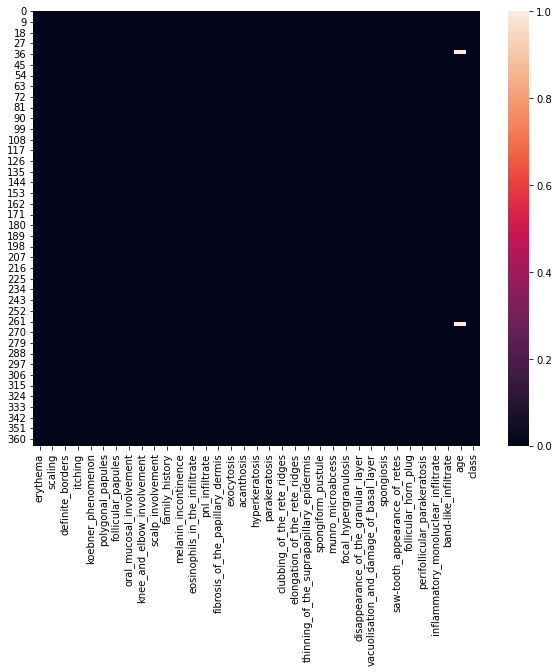

In [ ]:
# white means value is not available at that location.
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())

In [ ]:
df['age'].fillna(value=df['age'].mean(), inplace=True)

#df = df.fillna(df.mean())
df.isnull().sum().sum()

0

# Correlation 

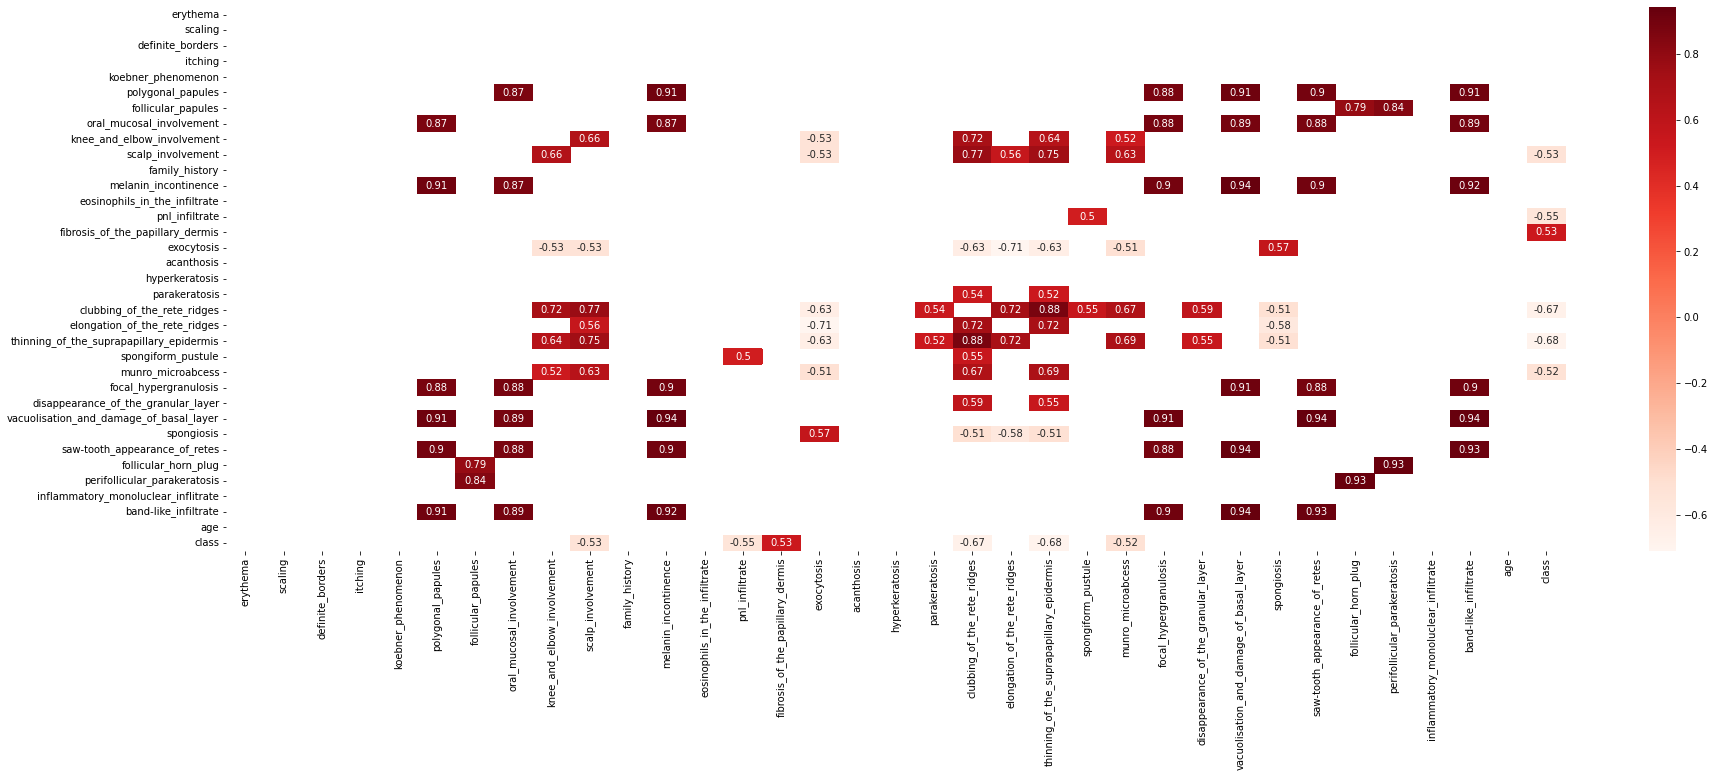

In [ ]:
#plotting correlation to understand more relevant value 
plt.figure(figsize=(30,10))
dfCorr = df.corr(method='pearson')
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

In [ ]:
dfCorr = df.corr(method='pearson')
df_corr_impact_action_yn = df[df.columns[0:35]].corr()['class'][:-1]
filteredDf = df_corr_impact_action_yn[((df_corr_impact_action_yn >= .5) | (df_corr_impact_action_yn <= -.5)) & (df_corr_impact_action_yn !=1.000)]
filteredDf


scalp_involvement                          -0.533208
pnl_infiltrate                             -0.550195
fibrosis_of_the_papillary_dermis            0.526976
clubbing_of_the_rete_ridges                -0.668781
thinning_of_the_suprapapillary_epidermis   -0.684864
munro_microabcess                          -0.520995
Name: class, dtype: float64

Above features are top relevant attribute with target attribute 'class'. 

In [ ]:
#top_relevant_var_disease
top_relevant_var_disease=['scalp_involvement','pnl_infiltrate','fibrosis_of_the_papillary_dermis','clubbing_of_the_rete_ridges','thinning_of_the_suprapapillary_epidermis','munro_microabcess']

In [ ]:
# all disease 
var_disease =['erythema','scaling','definite_borders','itching','koebner_phenomenon','polygonal_papules','follicular_papules','oral_mucosal_involvement','knee_and_elbow_involvement','scalp_involvement','melanin_incontinence','eosinophils_in_the_infiltrate','pnl_infiltrate','fibrosis_of_the_papillary_dermis','exocytosis','acanthosis','hyperkeratosis','parakeratosis','clubbing_of_the_rete_ridges','elongation_of_the_rete_ridges','thinning_of_the_suprapapillary_epidermis','spongiform_pustule','munro_microabcess','focal_hypergranulosis','disappearance_of_the_granular_layer','vacuolisation_and_damage_of_basal_layer','spongiosis','saw-tooth_appearance_of_retes','follicular_horn_plug','perifollicular_parakeratosis','inflammatory_monoluclear_inflitrate','band-like_infiltrate']

# Task 3: Plot the distribution of disease vs. age in order to understand the relationship between the two (use the same format as shown below). Is age a good indicator of disease? Fully explain your answer.

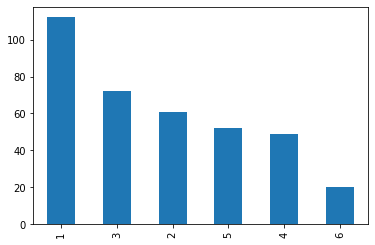

In [ ]:
df['class'].value_counts().plot.bar()

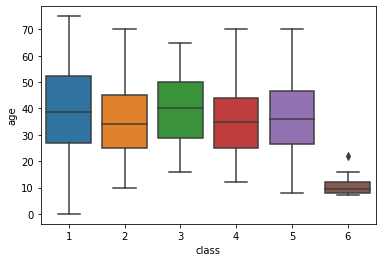

In [ ]:
sns.boxplot(data=df,y='age',x='class')

Age does not appear to be a good predictor of disease in this dataset. As the above bar graph shows, people between the ages of 30 and 40 are affected by a wide range of diseases. However, aging has an effect on disease in general.

# Task4:Use contingency tables to determine which ordinal attributes have the most leverage on disease. Plot the obtained results.

In [ ]:
# contingency table with top_relevant_disease, which is mentioned above

for var_name in top_relevant_var_disease:
  ct1 = pd.crosstab(index=[df[var_name]],columns=df['class'], margins=True)
  print(ct1)
  print("-----------------------------------------------------------------------------")

class                1   2   3   4   5   6  All
scalp_involvement                              
0                   23  56  70  49  52  14  264
1                   23   3   2   0   0   2   30
2                   50   2   0   0   0   4   56
3                   16   0   0   0   0   0   16
All                112  61  72  49  52  20  366
-----------------------------------------------------------------------------
class             1   2   3   4   5   6  All
pnl_infiltrate                              
0                34  17  72  43  52  17  235
1                37  23   0   6   0   3   69
2                35  20   0   0   0   0   55
3                 6   1   0   0   0   0    7
All             112  61  72  49  52  20  366
-----------------------------------------------------------------------------
class                               1   2   3   4   5   6  All
fibrosis_of_the_papillary_dermis                              
0                                 112  61  70  49   0  20  312
1   

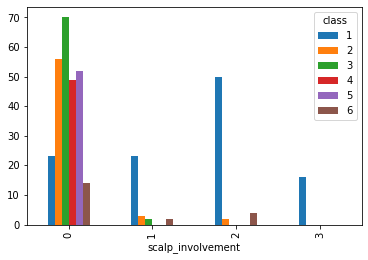

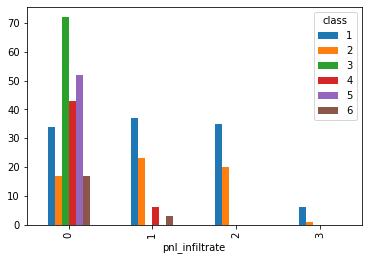

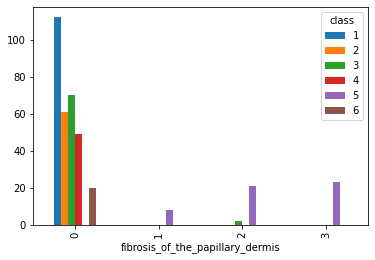

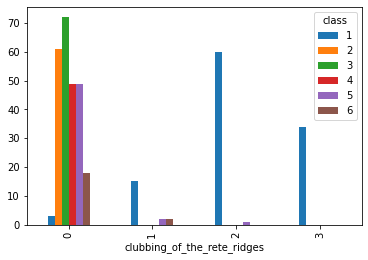

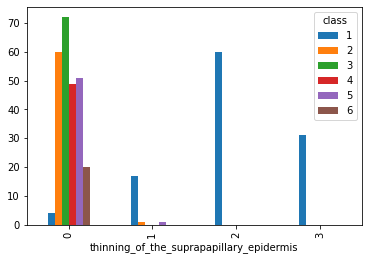

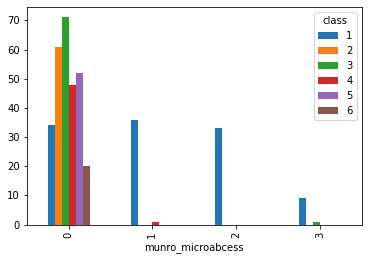

In [ ]:

# Ploting contingency tables
for var_name in top_relevant_var_disease:
  ct1 = pd.crosstab(index=[df[var_name]],columns=df['class'])
  ct1.plot(kind='bar')

# Task5: Create a new column disease_1 by extracting only those records where the Disease=1 (psoriasis) , assigning “1” for those rows in the newly created  column, and marking “0” for the rest. 

In [ ]:
df['disease_1'] = np.where(df['class']== 1, 1, 0)
df['disease_1'].value_counts()

0    254
1    112
Name: disease_1, dtype: int64

In [ ]:
df.head(5)

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,pnl_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,age,class,disease_1
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55.0,2,0
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8.0,1,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26.0,3,0
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40.0,1,1
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45.0,3,0


# Task 6:  A linear regression model for disease_1 vs. age even though disease_1 is a categoric variable. Plot the regression line, and compute the MSE and r-squared values for the model.

In [ ]:
#build a linear regression model
lr = LinearRegression()
x = df['age'].values.reshape(-1,1)
y = df['disease_1'].values.reshape(-1,1)
lr.fit(x,y)
lr.intercept_[0], lr.coef_[0][0]

(0.15789148358509988, 0.0040808651258150115)

In [ ]:
y_pred = lr.predict(x)
lr_accuracy_score = r2_score(y, y_pred)
print('R2 score:',           lr_accuracy_score)
print('Mean squared error:', mean_squared_error(y, y_pred))

R2 score: 0.017962960780911086
Mean squared error: 0.208553477945778


# 3-fold cross-validation for linear model

In [ ]:
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(lr, x, y, cv=3)
cross_validation.mean()

-0.01036201994585928

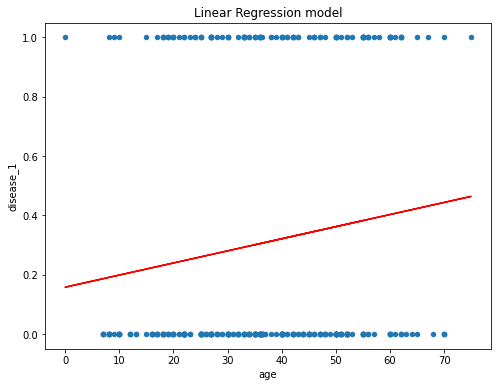

In [ ]:
# plot the best fit linear models
df.plot(kind='scatter', x='age', y='disease_1', figsize=(8, 6))

plt.plot(x, lr.intercept_ + lr.coef_*x, "r")
plt.title("Linear Regression model")
plt.show()

linear regression model accuracy are not good here as we can see in plot as well.

#Task 7: An NB classifier model for disease_1 vs. the top ranking (relevant) 5 attributes. Display the overall accuracy and the confusion matrix.

In [ ]:
nb_X = df[top_relevant_var_disease]
nb_y = df['disease_1'].values.reshape(-1,1)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score

NBmodel = GaussianNB()
NBmodel.fit(nb_X,nb_y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:

nb_pred = NBmodel.predict(nb_X)
nb_r2 = r2_score(nb_y, nb_pred)
nb_mse = mean_squared_error(nb_y, nb_pred)
nb_accuracy_score = accuracy_score(nb_y, nb_pred)
print('r2 score of GaussianNB is ',nb_r2)
print('Mean squared error:',nb_mse)
print('accuracy_score for NB model :',nb_accuracy_score)

r2 score of GaussianNB is  0.8327474690663667
Mean squared error: 0.03551912568306011
accuracy_score for NB model : 0.9644808743169399


[[241  13]
 [  0 112]]


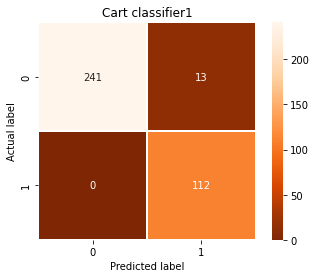

In [ ]:
nb_cm = confusion_matrix(nb_y,nb_pred)
print(nb_cm)

sns.heatmap(nb_cm, annot=True, linewidths=.5, square = True, cmap = 'Oranges_r', fmt='0.4g');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Cart classifier1")
plt.show()

#3-fold cross-validation of NB classifier

In [ ]:
cross_validation_NB = cross_val_score(NBmodel, nb_X, nb_y, cv=3)
cross_validation_NB.mean()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9754098360655737

NB classifier is giving around 97% accuracy with disease_1 and top_relevant attribute. 

#Task 8: A decision tree model (Gini or Entropy) for the entire feature space vs. the disease column. Display the relevant information about the generated tree, and print the confusion matrix.

In [ ]:
dt_X = df.drop(['class','disease_1'],axis=1)
dt_y = df['class'].values.reshape(-1,1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
#cn = ['class']

#function to create model
def makeDTModel(criterion, x, y,max_depth=None,max_leaf_nodes=None):
  return DecisionTreeClassifier(criterion=criterion,max_depth=max_depth,
                                max_leaf_nodes=max_leaf_nodes,random_state = 120).fit(x,y)

# display text and graphic representation of a tree classifier
def displayTree(classifier, X):
  tree.plot_tree(classifier, feature_names=X.columns.values.tolist(),filled = True)

# display text and heatmap of a confusion matrix
def displayCM(classifier, X, y):
  predictions = classifier.predict(X)
  cm = confusion_matrix(y_true=y, y_pred = predictions)
  print(cm)
  
  sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Oranges_r', fmt='0.4g');
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  plt.title("Cart classifier1")  

[[108   4   0   0   0   0]
 [  1  60   0   0   0   0]
 [  0   1  71   0   0   0]
 [  0  49   0   0   0   0]
 [  1  51   0   0   0   0]
 [  0  20   0   0   0   0]]


Text(0.5, 1.0, 'Gini confusion matrix')

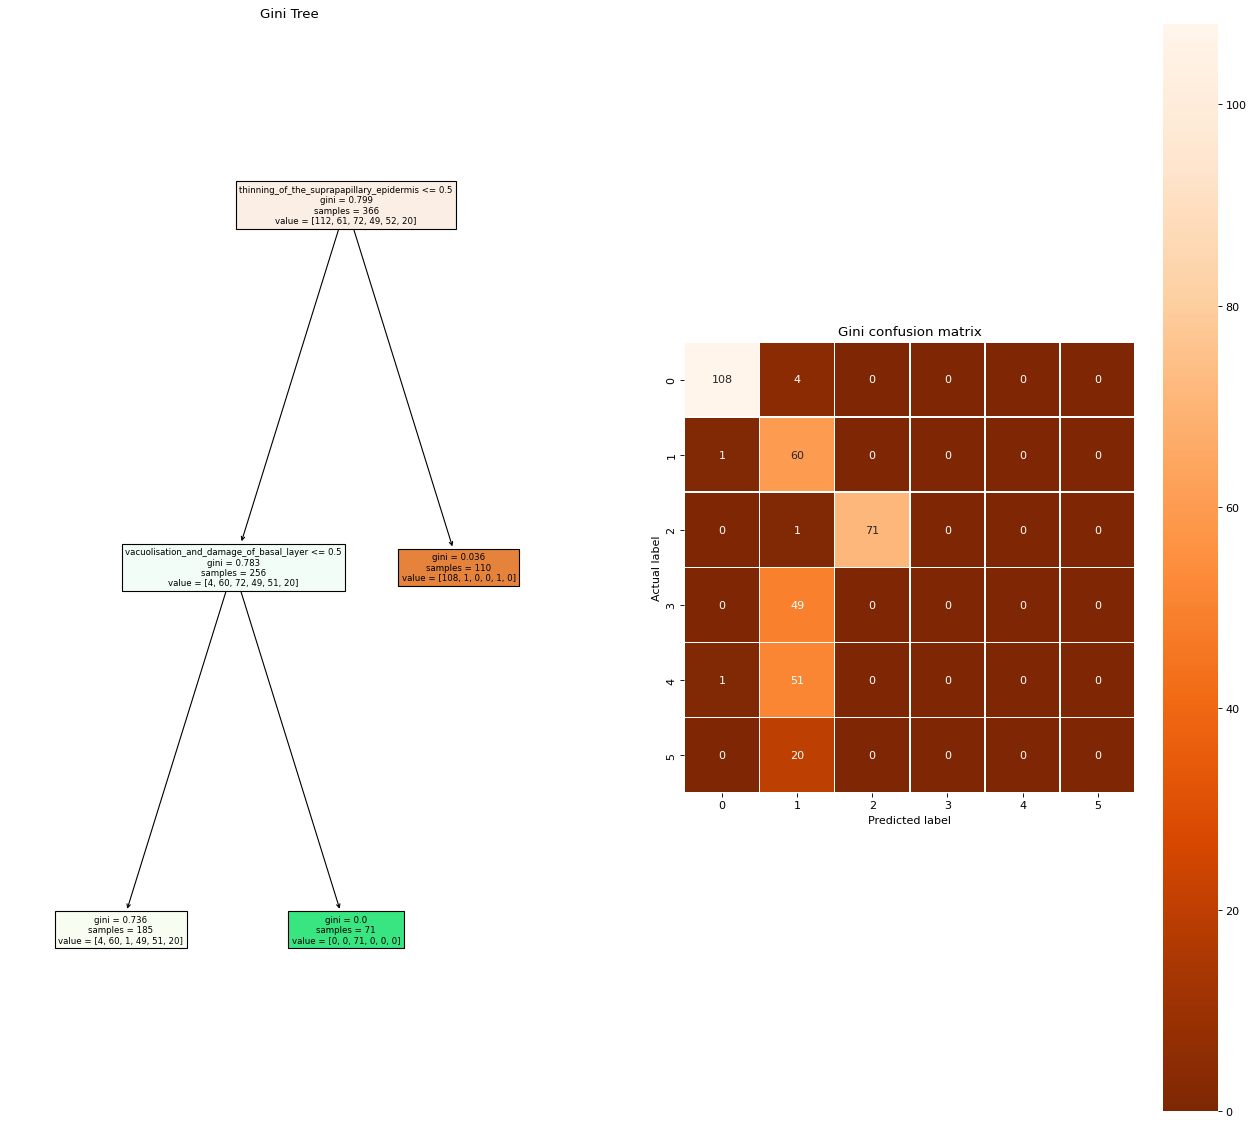

In [ ]:
dt_gini = makeDTModel("gini", dt_X, dt_y,2,3)

# Display tree for cart_classifier1
plt.figure(figsize=(20, 18), dpi=80)
plt.subplot(1,2,1)
displayTree(dt_gini, dt_X)
plt.title("Gini Tree")

plt.subplot(1,2,2)
cart_cm1 = displayCM(dt_gini, dt_X, dt_y)
plt.title("Gini confusion matrix")

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
dt_accuracy_score = accuracy_score(dt_y, dt_gini.predict(dt_X))
print('DT accuracy_score ',dt_accuracy_score)


DT accuracy_score  0.6530054644808743


# 3-fold cross-validation of Decision tree(Gini)

In [ ]:
cross_validation_CART = cross_val_score(dt_gini, dt_X, dt_y, cv=3)
cross_validation_CART.mean()

0.6502732240437158

We are getting 65% accuracy with gini entropy when we are using entire features vs disease.

# Task 9: A random forest model for the entire feature space vs. the disease column. Display the relevant information about one of the generated trees, and print the confusion matrix. Plot the model's .feature_importances_ which is a measure of the accumulation of the impurity decrease within each tree.

In [ ]:
rfc_X = df.drop(['class'],axis=1)
rfc_y = df['class'].values.reshape(-1,1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

rfc = RandomForestClassifier(n_estimators=100, 
                            max_depth=3,
                            max_features='auto', 
                            min_samples_leaf=4,
                            bootstrap=True, 
                            n_jobs=-1, 
                            random_state=0)

rfc.fit(rfc_X,rfc_y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


RandomForestClassifier(max_depth=3, min_samples_leaf=4, n_jobs=-1,
                       random_state=0)

[Text(0.5555555555555556, 0.875, 'elongation_of_the_rete_ridges <= 0.5\ngini = 0.804\nsamples = 232\nvalue = [104, 70, 72, 41, 57, 22]'),
 Text(0.3333333333333333, 0.625, 'melanin_incontinence <= 0.5\ngini = 0.718\nsamples = 125\nvalue = [0, 60, 72, 41, 4, 19]'),
 Text(0.2222222222222222, 0.375, 'follicular_papules <= 1.5\ngini = 0.649\nsamples = 82\nvalue = [0, 60, 3, 41, 4, 19]'),
 Text(0.1111111111111111, 0.125, 'gini = 0.545\nsamples = 69\nvalue = [0, 60, 3, 41, 4, 0]'),
 Text(0.3333333333333333, 0.125, 'gini = 0.0\nsamples = 13\nvalue = [0, 0, 0, 0, 0, 19]'),
 Text(0.4444444444444444, 0.375, 'gini = 0.0\nsamples = 43\nvalue = [0, 0, 69, 0, 0, 0]'),
 Text(0.7777777777777778, 0.625, 'disease_1 <= 0.5\ngini = 0.525\nsamples = 107\nvalue = [104, 10, 0, 0, 53, 3]'),
 Text(0.6666666666666666, 0.375, 'spongiosis <= 1.5\ngini = 0.33\nsamples = 39\nvalue = [0, 10, 0, 0, 53, 3]'),
 Text(0.5555555555555556, 0.125, 'gini = 0.144\nsamples = 30\nvalue = [0, 1, 0, 0, 48, 3]'),
 Text(0.7777777777

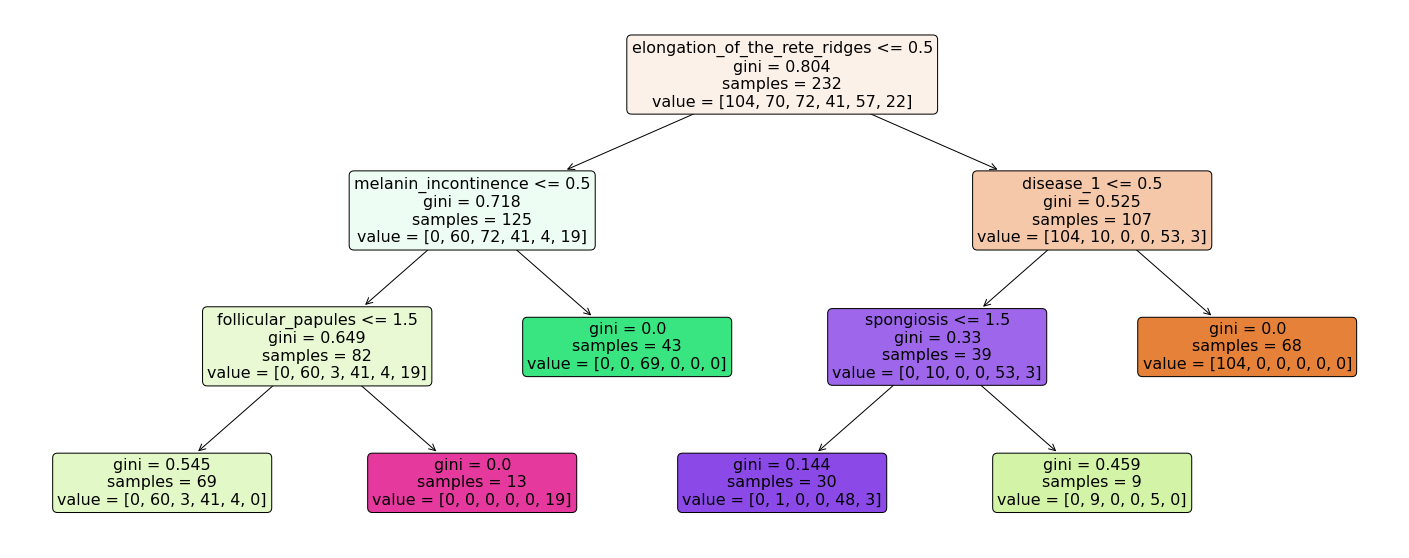

In [ ]:
fig = plt.figure(figsize=(25, 10))
plot_tree(rfc.estimators_[0], 
          feature_names=rfc_X.keys(),
         # class_names=df['class'].name, 
          filled=True, impurity=True, 
          rounded=True)

[[112   0   0   0   0   0]
 [  0  61   0   0   0   0]
 [  0   0  72   0   0   0]
 [  0   9   0  40   0   0]
 [  0   0   0   0  52   0]
 [  0   4   0   0   0  16]]


Text(0.5, 1.0, 'Cart classifier1')

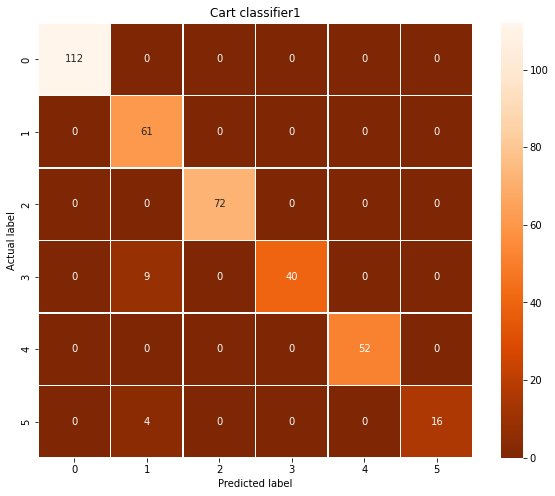

In [ ]:
rfc_pred = rfc.predict(rfc_X)
rfc_cm = confusion_matrix(y_true=rfc_y, y_pred = rfc_pred)
print(rfc_cm)

plt.figure(figsize=(10,8))
sns.heatmap(rfc_cm, annot=True, linewidths=.5, square = True, cmap = 'Oranges_r', fmt='0.4g');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Cart classifier1")  

In [ ]:
print('R2 score:',           r2_score(rfc_y, rfc_pred))
print('Mean squared error:', mean_squared_error(rfc_y, rfc_pred))

R2 score: 0.8926849864536786
Mean squared error: 0.273224043715847


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
rfc_accuracy_score = accuracy_score(rfc_y,rfc_pred)
rfc_accuracy_score

0.9644808743169399

# 3-fold cross-validation of Random Forest classification

In [ ]:
rfc_cross_validation = cross_val_score(rfc, rfc_X, rfc_y, cv=3)
rfc_cross_validation.mean()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


0.9453551912568307

Random forest classifier is giving around 97% accuracy with entire features vs disease.

# Plot the model's .feature_importances_

In [ ]:
def plot_feature_importance(importance,names,model_type):
  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

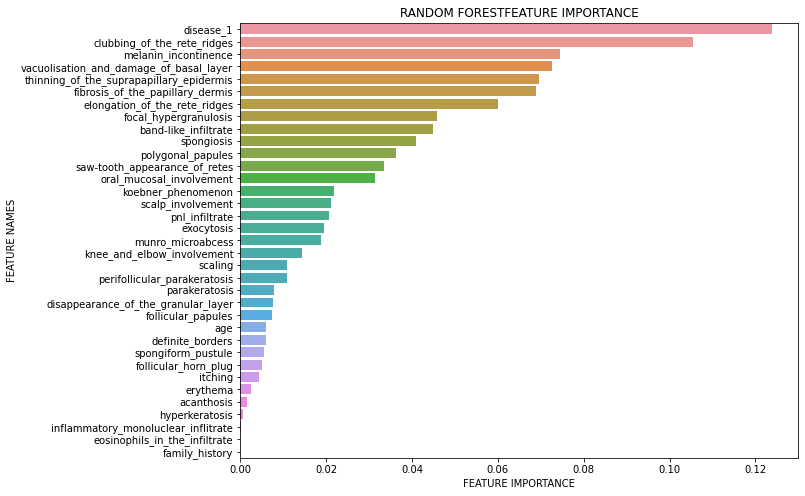

In [ ]:
plot_feature_importance(rfc.feature_importances_,rfc_X.columns,'RANDOM FOREST')

# Summary:
we created 4 four model and printed accuracy and plot. It has been discovered that the NB classifier and random forest models provide the highest accuracy compared to the other two models. For the NB model, we only used disease 1 with the most significant features, however for the random forest models, we used all features. As a result, comparing these two modals is not a smart idea in general.

In [ ]:
labels = ["Linear_regression", "NB_classifier", "Decision_tree", "Random_forest"]
model_scores = [lr_accuracy_score , nb_accuracy_score, dt_accuracy_score, rfc_accuracy_score]

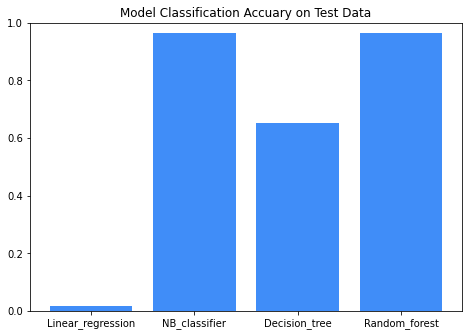

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Test Data')
ax.bar(labels, model_scores, color="#408df8")
ax.set_ylim(0, 1)
plt.show()